This is the setup cell

In [1]:
import datetime
import pathlib
import time
import math

import obspy
from obspy.signal import PPSD
import scipy
import matplotlib.pyplot as plt
import matplotlib
#Run this line if you want interactive plots
#%matplotlib qt
import numpy as np

import sprit

In [2]:
#sprit.gui()

In [3]:
dPath = r'\\isgs-sinkhole.ad.uillinois.edu\geophysics\HVSR\LakeCalumet\LC_RaspShake'
#dPath = r'\\isgs-sinkhole.ad.uillinois.edu\geophysics\HVSR\LakeCalumet\LC_RaspShake\Test12_AM.RAC84.00.2023-02-15_2132-2200.mseed'
trimDir = r'\\isgs-sinkhole.ad.uillinois.edu\geophysics\HVSR\LakeCalumet\LC_RaspShake'
#dPath = r"\\isgs-sinkhole.ad.uillinois.edu\geophysics\HVSR\ChampaignCo\Mahomet2023\Data\RawData"
dPath = r"C:\Users\riley\OneDrive - University of Illinois - Urbana\Data_OneDrive\Seismic\HVSR\Data\RAC84"
dPath = r"C:\Users\riley\OneDrive - University of Illinois - Urbana\Data_OneDrive\Seismic\HVSR\Data\UOFI1_AM.RAC84.00.2023-02-15_1704-1734.mseed"
dPath = r"\\isgs-sinkhole\geophysics\HVSR\LakeCalumet\LC_RaspShake\HVSR Site_AM.RAC84.00.2023.046_2023-02-15_1704-1734.mseed"
dPath = r"C:\Users\riley\OneDrive - University of Illinois - Urbana\Data_OneDrive\Seismic\HVSR\Data\UOFI1_AM.RAC84.00.2023-02-15_1704-1734.mseed"

params = sprit.input_params(dataPath=dPath)

No metadata file specified!
Using default metadata file for Raspberry Shake v.7 distributed with package


In [4]:
params = sprit.get_metadata(params)
params = sprit.fetch_data(params=params, source='file')

c:\Users\riley\LocalData\virtual_envs\seismic310_venv\lib\site-packages\obspy\core\inventory\network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)


In [5]:
#params = sprit.remove_noise(input=params, kind='manual')
#params = sprit.remove_noise(input=params, kind='auto')

In [7]:
params = sprit.generate_ppsds(params=params, stream=params['stream'], ppsd_length=30, 
                              overlap=0.1, period_step_octaves=0.5, remove_outliers=True, outlier_std=1.5)
hvsr_dict = sprit.process_hvsr(params=params, method=1, resample=False, smooth=3, freq_smooth=False, f_smooth_width=10, remove_outlier_curves=False)
hvsr_dict = sprit.check_peaks(hvsr_dict=hvsr_dict)

{'stream': <obspy.core.stream.Stream object at 0x0000024AF4876890>, 'ppsd_length': 30, 'overlap': 0.1, 'period_step_octaves': 0.5, 'skip_on_gaps': True}
Getting main curve
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
No frequency smoothing is being applied. This is not recommended for noisy datasets.
Getting HVSR Curve time steps
0
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
2
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
3
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
4
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
5
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
6
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
7
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
8
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
9
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
10
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
11
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
12
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
13
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
14
17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
15
17
0
1
2
3
4
5
6
7


In [ ]:
sprit.hvplot()

In [75]:
def __remove_db(_db_value):
    _values = list()
    for _d in _db_value:
        _values.append(10 ** (float(_d) / 10.0))
    return _values

def __get_power(_db, _x):
    _dx = abs(np.diff(_x)[0])
    _p = np.multiply(np.mean(__remove_db(_db)), _dx)
    return _p

def dfa(params, x_values, verbose=False):#, equal_interval_energy, median_daily_psd, verbose=False):
    """Function for performing Diffuse Field Assumption (DFA) analysis
    
        This feature is not yet implemented.
    """
    # Are we doing DFA?
    # Use equal energy for daily PSDs to give small 'events' a chance to contribute
    # the same as large ones, so that P1+P2+P3=1
    
    method=params['method']
    
    methodList = ['Diffuse Field Assumption', 'Arithmetic Mean', 'Geometric Mean', 'Vector Summation', 'Quadratic Mean', 'Maximum Horizontal Value']
    dfaList = ['dfa', 'diffuse field', 'diffuse field assumption']
    if type(method) is int:
        method = methodList[method]

    if method in dfaList:
        if verbose:
            print('[INFO] Diffuse Field Assumption', flush=True)
        params['dfa'] = {}
        params['dfa']['sum_ns_power'] = list()
        params['dfa']['sum_ew_power'] = list()
        params['dfa']['sum_z_power'] = list()
        params['dfa']['time_int_psd'] = {'Z':{}, 'E':{}, 'N':{}}
        params['dfa']['time_values'] = list()
        params['dfa']['equal_interval_energy'] = {'Z':{}, 'E':{}, 'N':{}}

        # Make sure we have all 3 components for every time sample
        for i, day_time in enumerate(params['ppsds']['Z']['current_times_used']):#day_time_values):
            #if day_time not in (day_time_psd[0].keys()) or day_time not in (day_time_psd[1].keys()) or day_time not in (day_time_psd[2].keys()):
            #    continue
            
            #Currently the same as day_time, and probably notneeded to redefine
            time_int = str(params['ppsds']['Z']['current_times_used'][i])#day_time.split('T')[0]
            if time_int not in params['dfa']['time_values']:
                params['dfa']['time_values'].append(time_int)

            # Initialize the PSDs.
            if time_int not in params['dfa']['time_int_psd']['Z'].keys():
                params['dfa']['time_int_psd']['Z'][time_int] = list()
                params['dfa']['time_int_psd']['E'][time_int] = list()
                params['dfa']['time_int_psd']['N'][time_int] = list()

            params['dfa']['time_int_psd']['Z'][time_int].append(params['ppsds']['Z']['psd_values'][i])
            params['dfa']['time_int_psd']['E'][time_int].append(params['ppsds']['E']['psd_values'][i])
            params['dfa']['time_int_psd']['N'][time_int].append(params['ppsds']['N']['psd_values'][i])

        # For each time_int equalize energy
        for time_int in params['dfa']['time_values']:

            # Each PSD for the time_int
            for k in range(len(params['dfa']['time_int_psd']['Z'][time_int])):
                Pz = list()
                P1 = list()
                P2 = list()
                sum_pz = 0
                sum_p1 = 0
                sum_p2 = 0

                # Each sample of the PSD , convert to power
                for j in range(len(x_values) - 1):
                    pz = __get_power([params['dfa']['time_int_psd']['Z'][time_int][k][j], params['dfa']['time_int_psd']['Z'][time_int][k][j + 1]], [x_values[j], x_values[j + 1]])
                    Pz.append(pz)
                    sum_pz += pz
                    p1 = __get_power([params['dfa']['time_int_psd']['E'][time_int][k][j], params['dfa']['time_int_psd']['E'][time_int][k][j + 1]], [x_values[j], x_values[j + 1]])
                    P1.append(p1)
                    sum_p1 += p1
                    p2 = __get_power([params['dfa']['time_int_psd']['N'][time_int][k][j], params['dfa']['time_int_psd']['N'][time_int][k][j + 1]], [x_values[j], x_values[j + 1]])
                    P2.append(p2)
                    sum_p2 += p2

                sum_power = sum_pz + sum_p1 + sum_p2  # total power

                # Mormalized power
                for j in range(len(x_values) - 1):
                    # Initialize if this is the first sample of the time_int
                    if k == 0:
                        params['dfa']['sum_z_power'].append(Pz[j] / sum_power)
                        params['dfa']['sum_ns_power'].append(P1[j] / sum_power)
                        params['dfa']['sum_ew_power'].append(P2[j] / sum_power)
                    else:
                        params['dfa']['sum_z_power'][j] += (Pz[j] / sum_power)
                        params['dfa']['sum_ns_power'][j] += (P1[j] / sum_power)
                        params['dfa']['sum_ew_power'][j] += (P2[j] / sum_power)
            # Average the normalized daily power
            for j in range(len(x_values) - 1):
                params['dfa']['sum_z_power'][j] /= len(params['dfa']['time_int_psd']['Z'][time_int])
                params['dfa']['sum_ns_power'][j] /= len(params['dfa']['time_int_psd']['Z'][time_int])
                params['dfa']['sum_ew_power'][j] /= len(params['dfa']['time_int_psd']['Z'][time_int])

            params['dfa']['equal_interval_energy']['Z'][time_int] = params['dfa']['sum_z_power']
            params['dfa']['equal_interval_energy']['E'][time_int] = params['dfa']['sum_ns_power']
            params['dfa']['equal_interval_energy']['N'][time_int] = params['dfa']['sum_ew_power']

    return params

hvsr_dict_test['method'] = 'dfa'
hvsr_dict_test = dfa(hvsr_dict_test, day_time_psd=0, x_values=params['ppsds']['Z']['period_bin_centers'])

In [81]:
hvsr_dict_test.keys()

dict_keys(['input_params', 'x_freqs', 'hvsr_curve', 'x_period', 'psd_raw', 'current_times_used', 'psd_values_tavg', 'ppsd_std', 'ppsd_std_vals_m', 'ppsd_std_vals_p', 'method', 'ppsds', 'ppsds_obspy', 'tsteps_used', 'xwindows_out', 'ind_hvsr_curves', 'ind_hvsr_stdDev', 'ind_hvsr_peak_indices', 'hvsr_peak_indices', 'hvsr_peak_freqs', 'hvsr_log_std', 'peak_water_level', 'peak_water_level_p', 'peak_water_level_m', 'hvsrp', 'hvsrm', 'hvsrp2', 'hvsrm2', 'stream', 'hvsr_band', 'Peak Report', 'Best Peak', 'dfa'])

In [39]:
params['ppsds']['Z']['period_bin_centers']

array([ 0.02      ,  0.02013911,  0.02027919,  0.02042024,  0.02056228,
        0.0207053 ,  0.02084932,  0.02099433,  0.02114036,  0.0212874 ,
        0.02143547,  0.02158456,  0.0217347 ,  0.02188587,  0.0220381 ,
        0.02219139,  0.02234574,  0.02250117,  0.02265768,  0.02281527,
        0.02297397,  0.02313376,  0.02329467,  0.0234567 ,  0.02361985,
        0.02378414,  0.02394957,  0.02411616,  0.0242839 ,  0.02445281,
        0.02462289,  0.02479415,  0.02496661,  0.02514027,  0.02531513,
        0.02549121,  0.02566852,  0.02584706,  0.02602684,  0.02620787,
        0.02639016,  0.02657372,  0.02675855,  0.02694467,  0.02713209,
        0.02732081,  0.02751084,  0.02770219,  0.02789487,  0.0280889 ,
        0.02828427,  0.028481  ,  0.0286791 ,  0.02887858,  0.02907945,
        0.02928171,  0.02948538,  0.02969047,  0.02989698,  0.03010493,
        0.03031433,  0.03052518,  0.0307375 ,  0.0309513 ,  0.03116658,
        0.03138336,  0.03160165,  0.03182146,  0.0320428 ,  0.03

In [32]:
params['tsteps_used']

[57, 57]

KeyError: 1

In [13]:
hvsr_dict['Best Peak']

{'f0': 2.8455766764843964,
 'A0': 7.359601241271231,
 'f-': '     0.716 ✔',
 'f+': '    11.311 ✔',
 'Sf': 0.12609812179670607,
 'Sa': 0.027801241925517136,
 'Score': 6,
 'Report': {'Lw': '2.846 > 10 / 60  ✔',
  'Nc': '9732.0 > 200  ✔',
  'σ_A(f)': 'σ_A for all freqs 1.423-5.691 < 2  ✔',
  'A(f-)': 'A(0.716): 1.812 < 3.68  ✔',
  'A(f+)': 'A(11.311): 1.69 < 3.68  ✔',
  'A0': '      7.36 > 2.0 ✔',
  'P+': '2.863 within ±5% of 2.846 ✔',
  'P-': '2.828 within ±5% of 2.846 ✔',
  'Sf': '    0.1261 < 0.05 * 2.846 ✔',
  'Sa': '    0.0278 < 0.20 ✔'},
 'Pass List': {'Window Length Freq.': True,
  'Significant Cycles': True,
  'Low Curve StDev. over time': True,
  'Peak Freq. Clarity Below': True,
  'Peak Freq. Clarity Above': True,
  'Peak Amp. Clarity': True,
  'Freq. Stability': True,
  'Peak Stability (freq. std)': True,
  'Peak Stability (amp. std)': True},
 'Peak Passes': True}

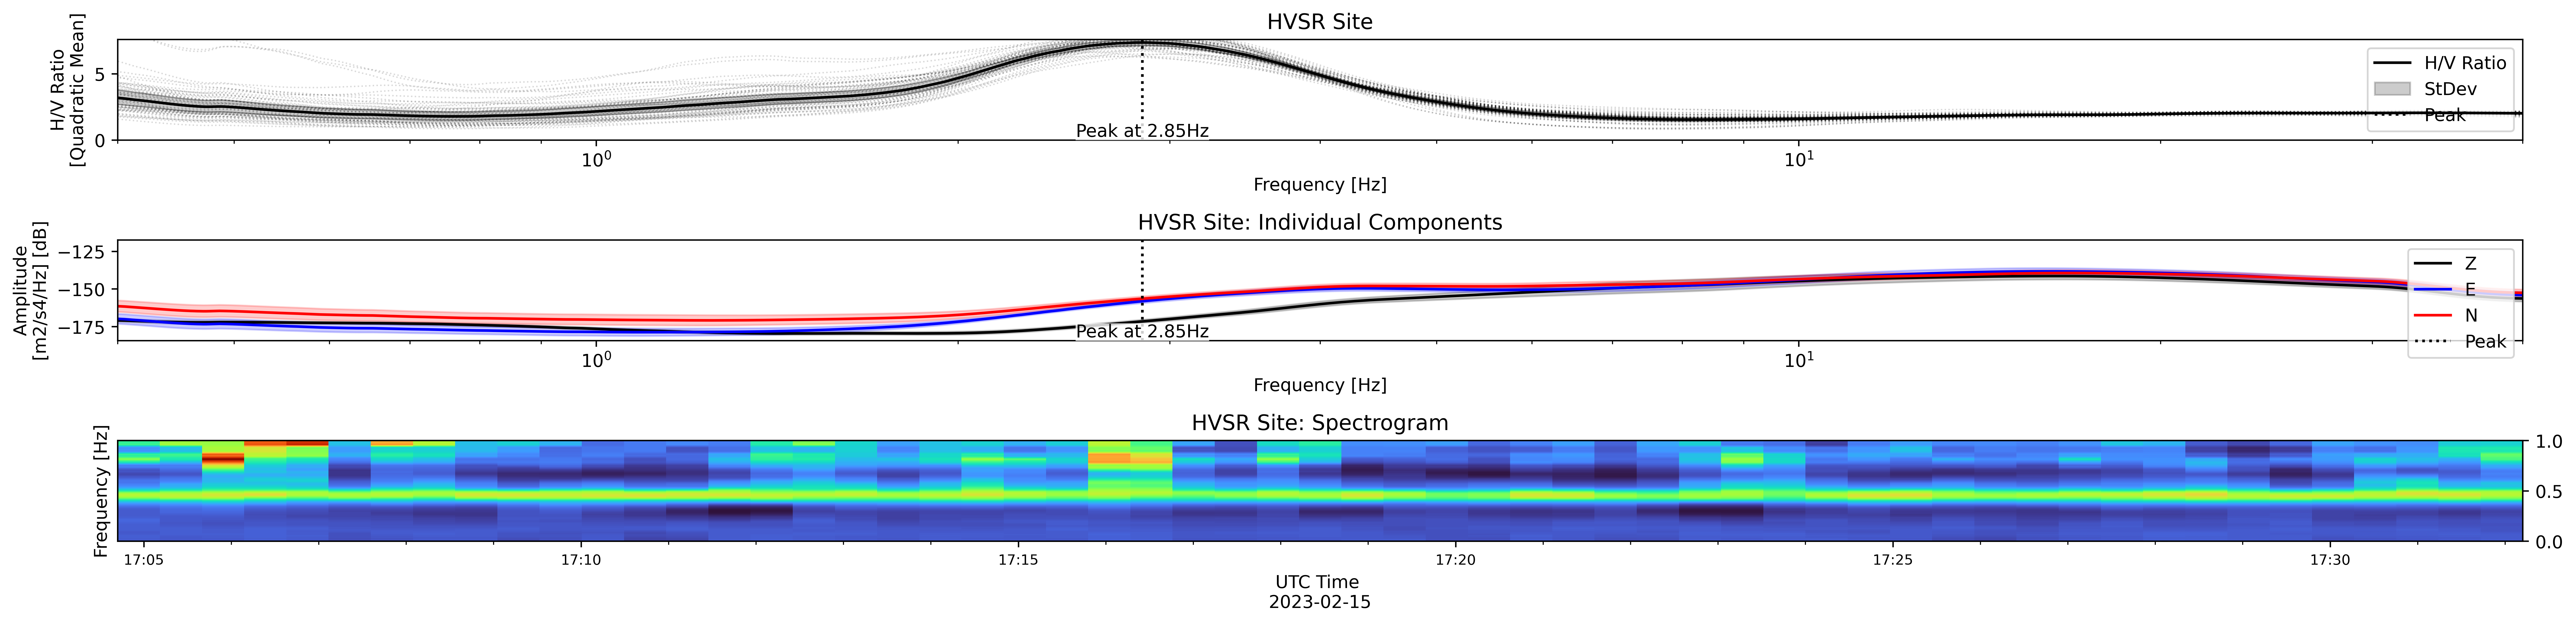

In [12]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 500
sprit.hvplot(hvsr_dict, kind='hvsr p t ann c+ p ann spec', cmap='turbo', peak_plot=False)

['hvsr', 'comp', 'spec']
[0, 5, 8, 9]
['hvsr', 'p', 't', '-s', 'ann']
['c+', 'p', 'ann']
['spec']


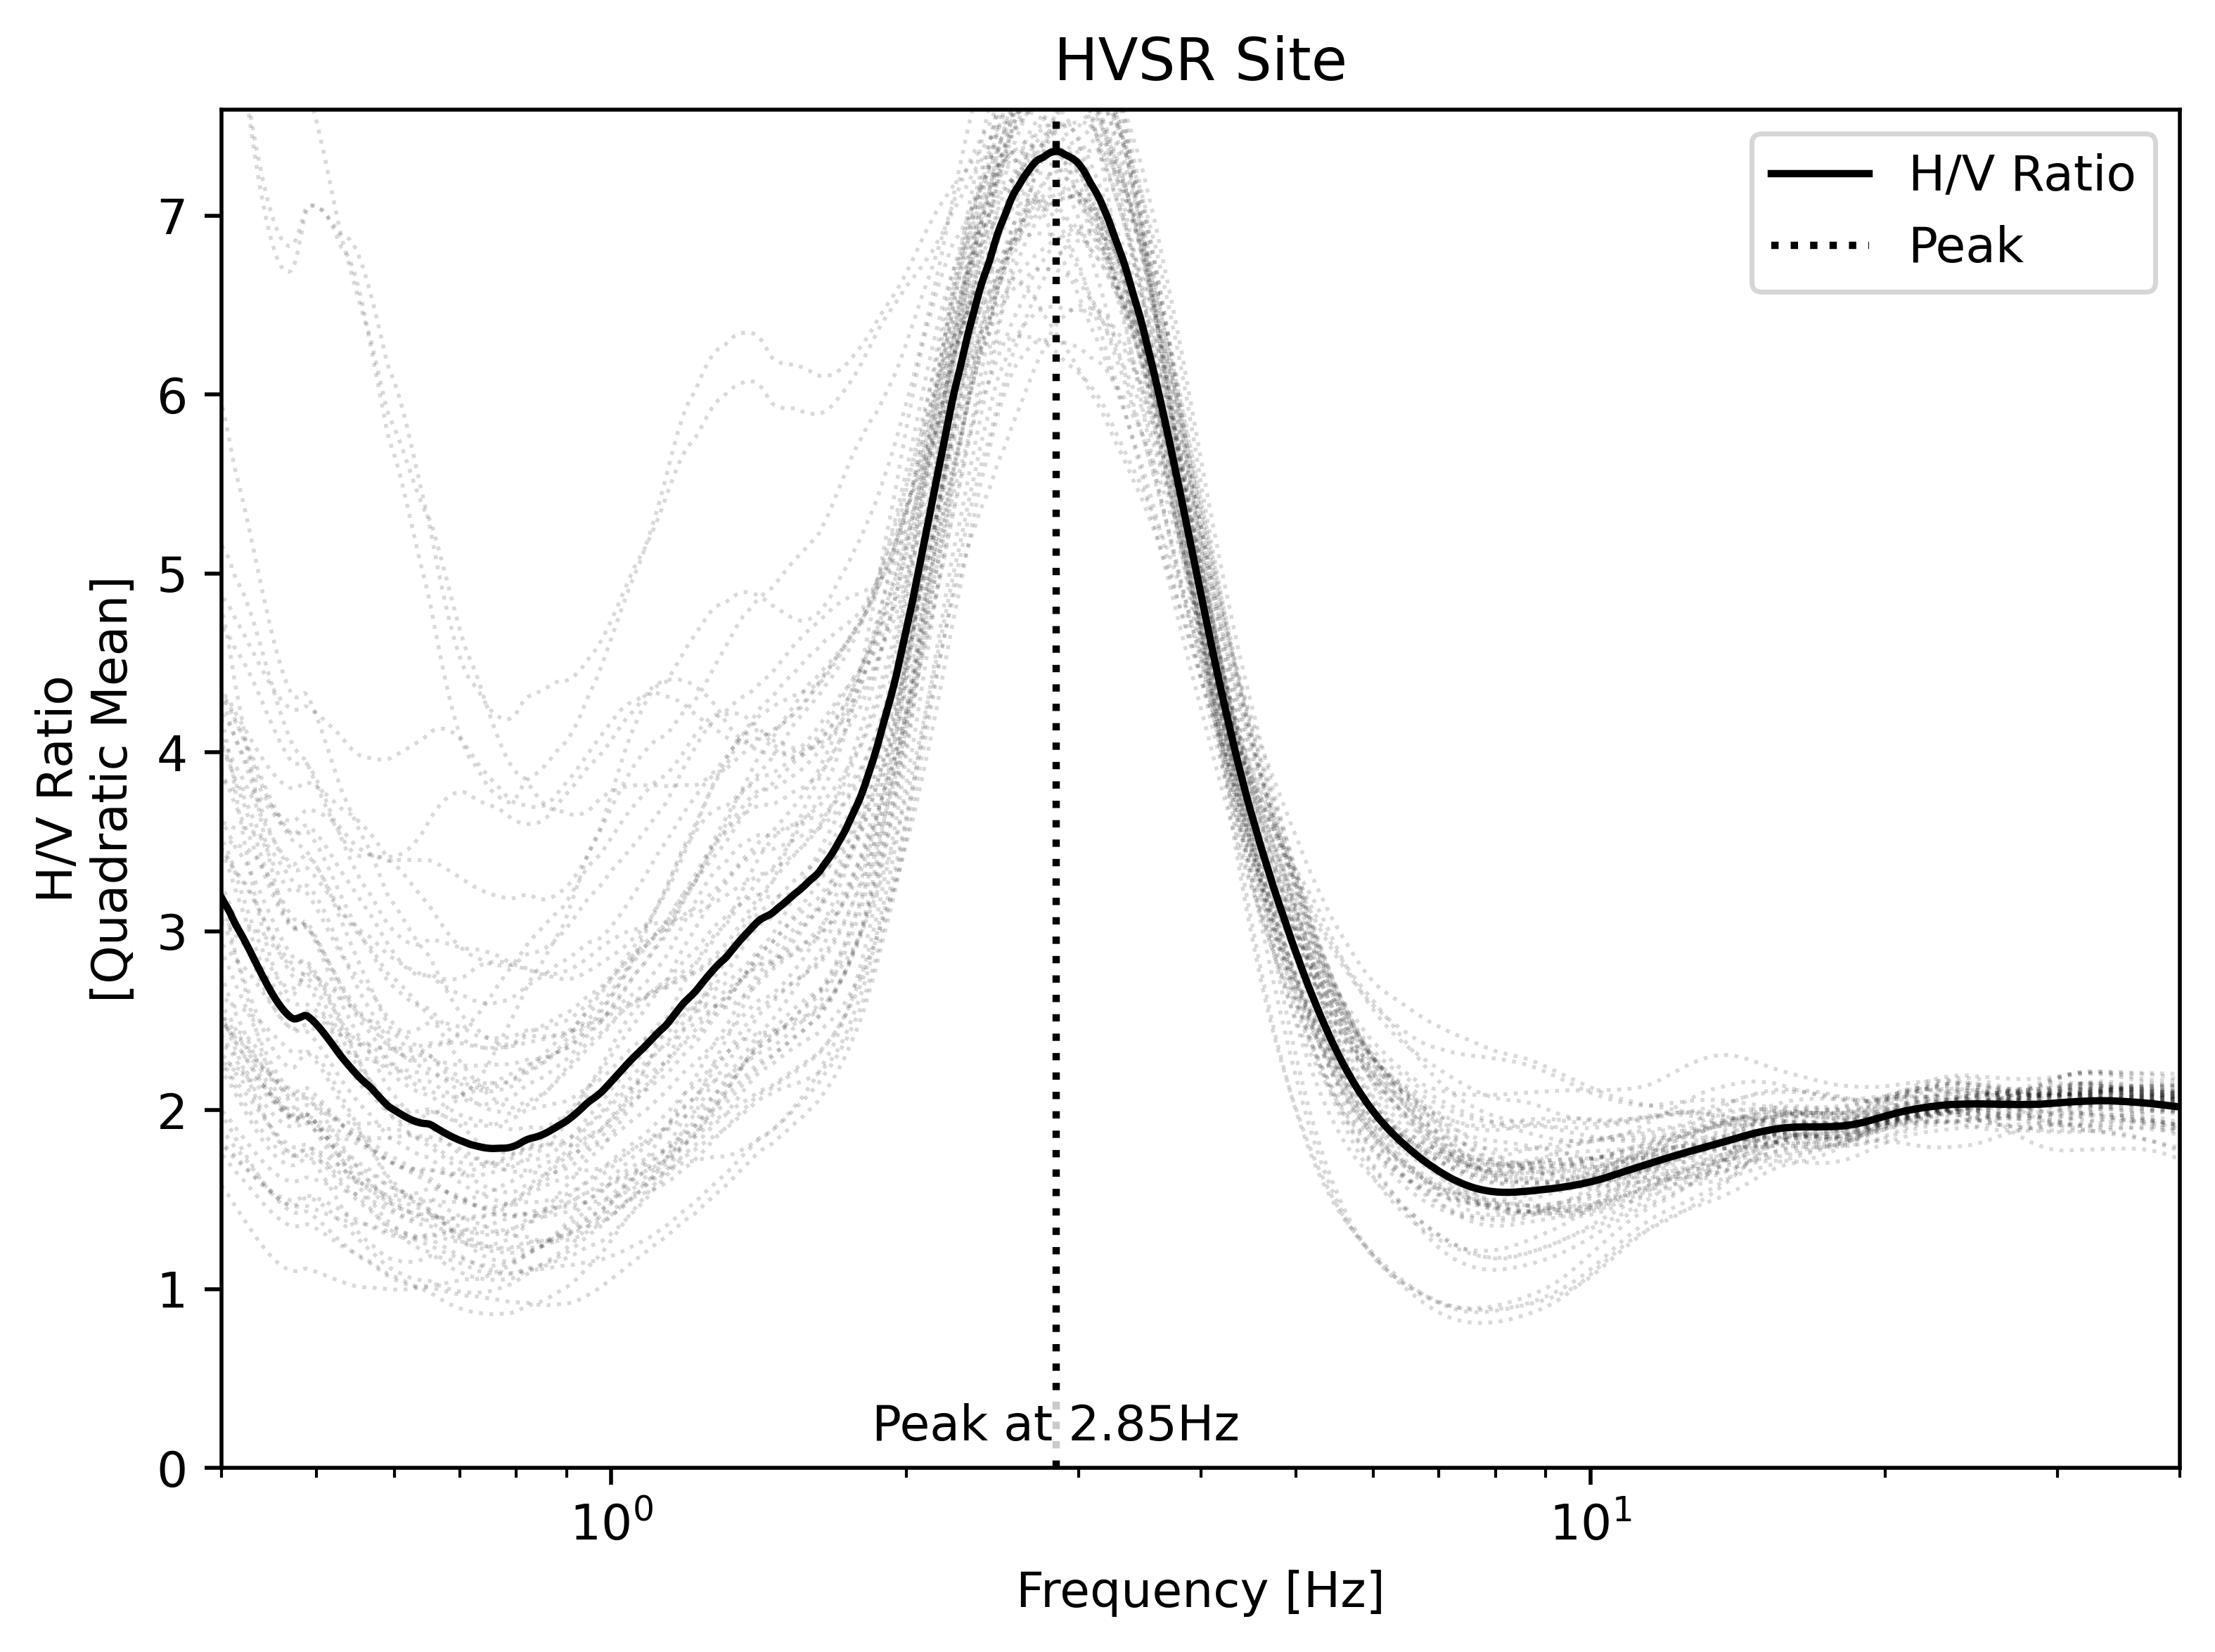

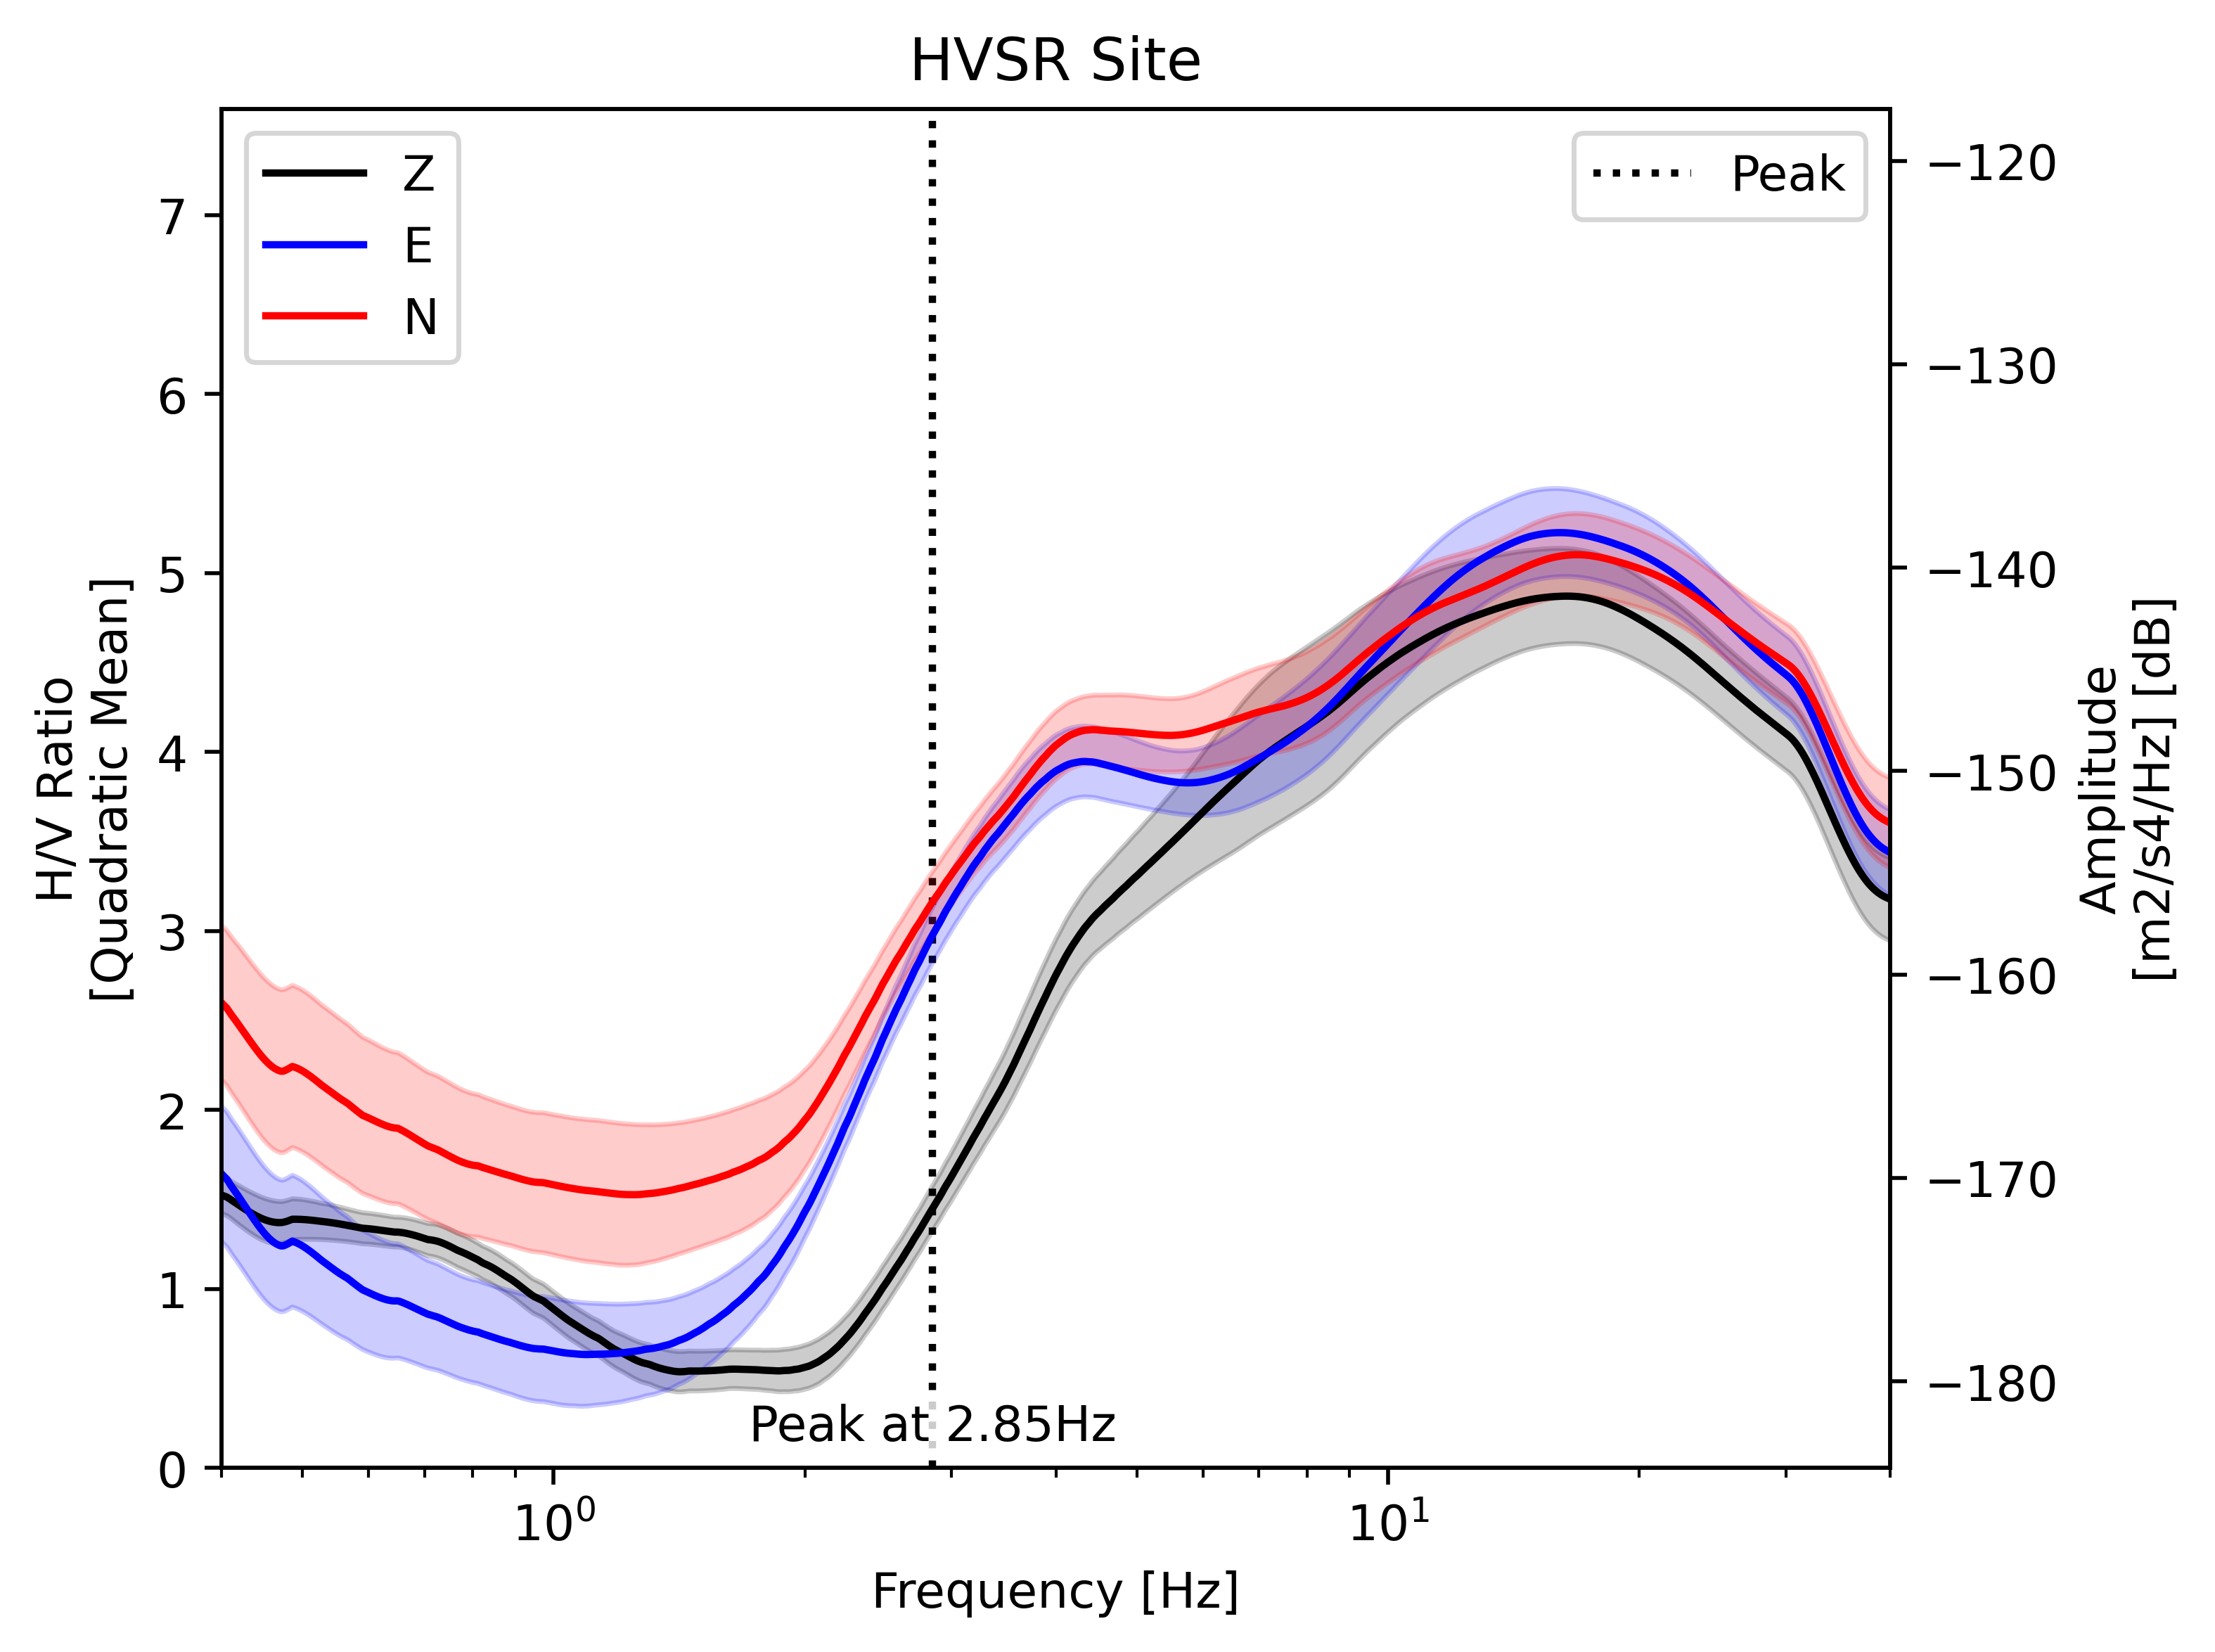

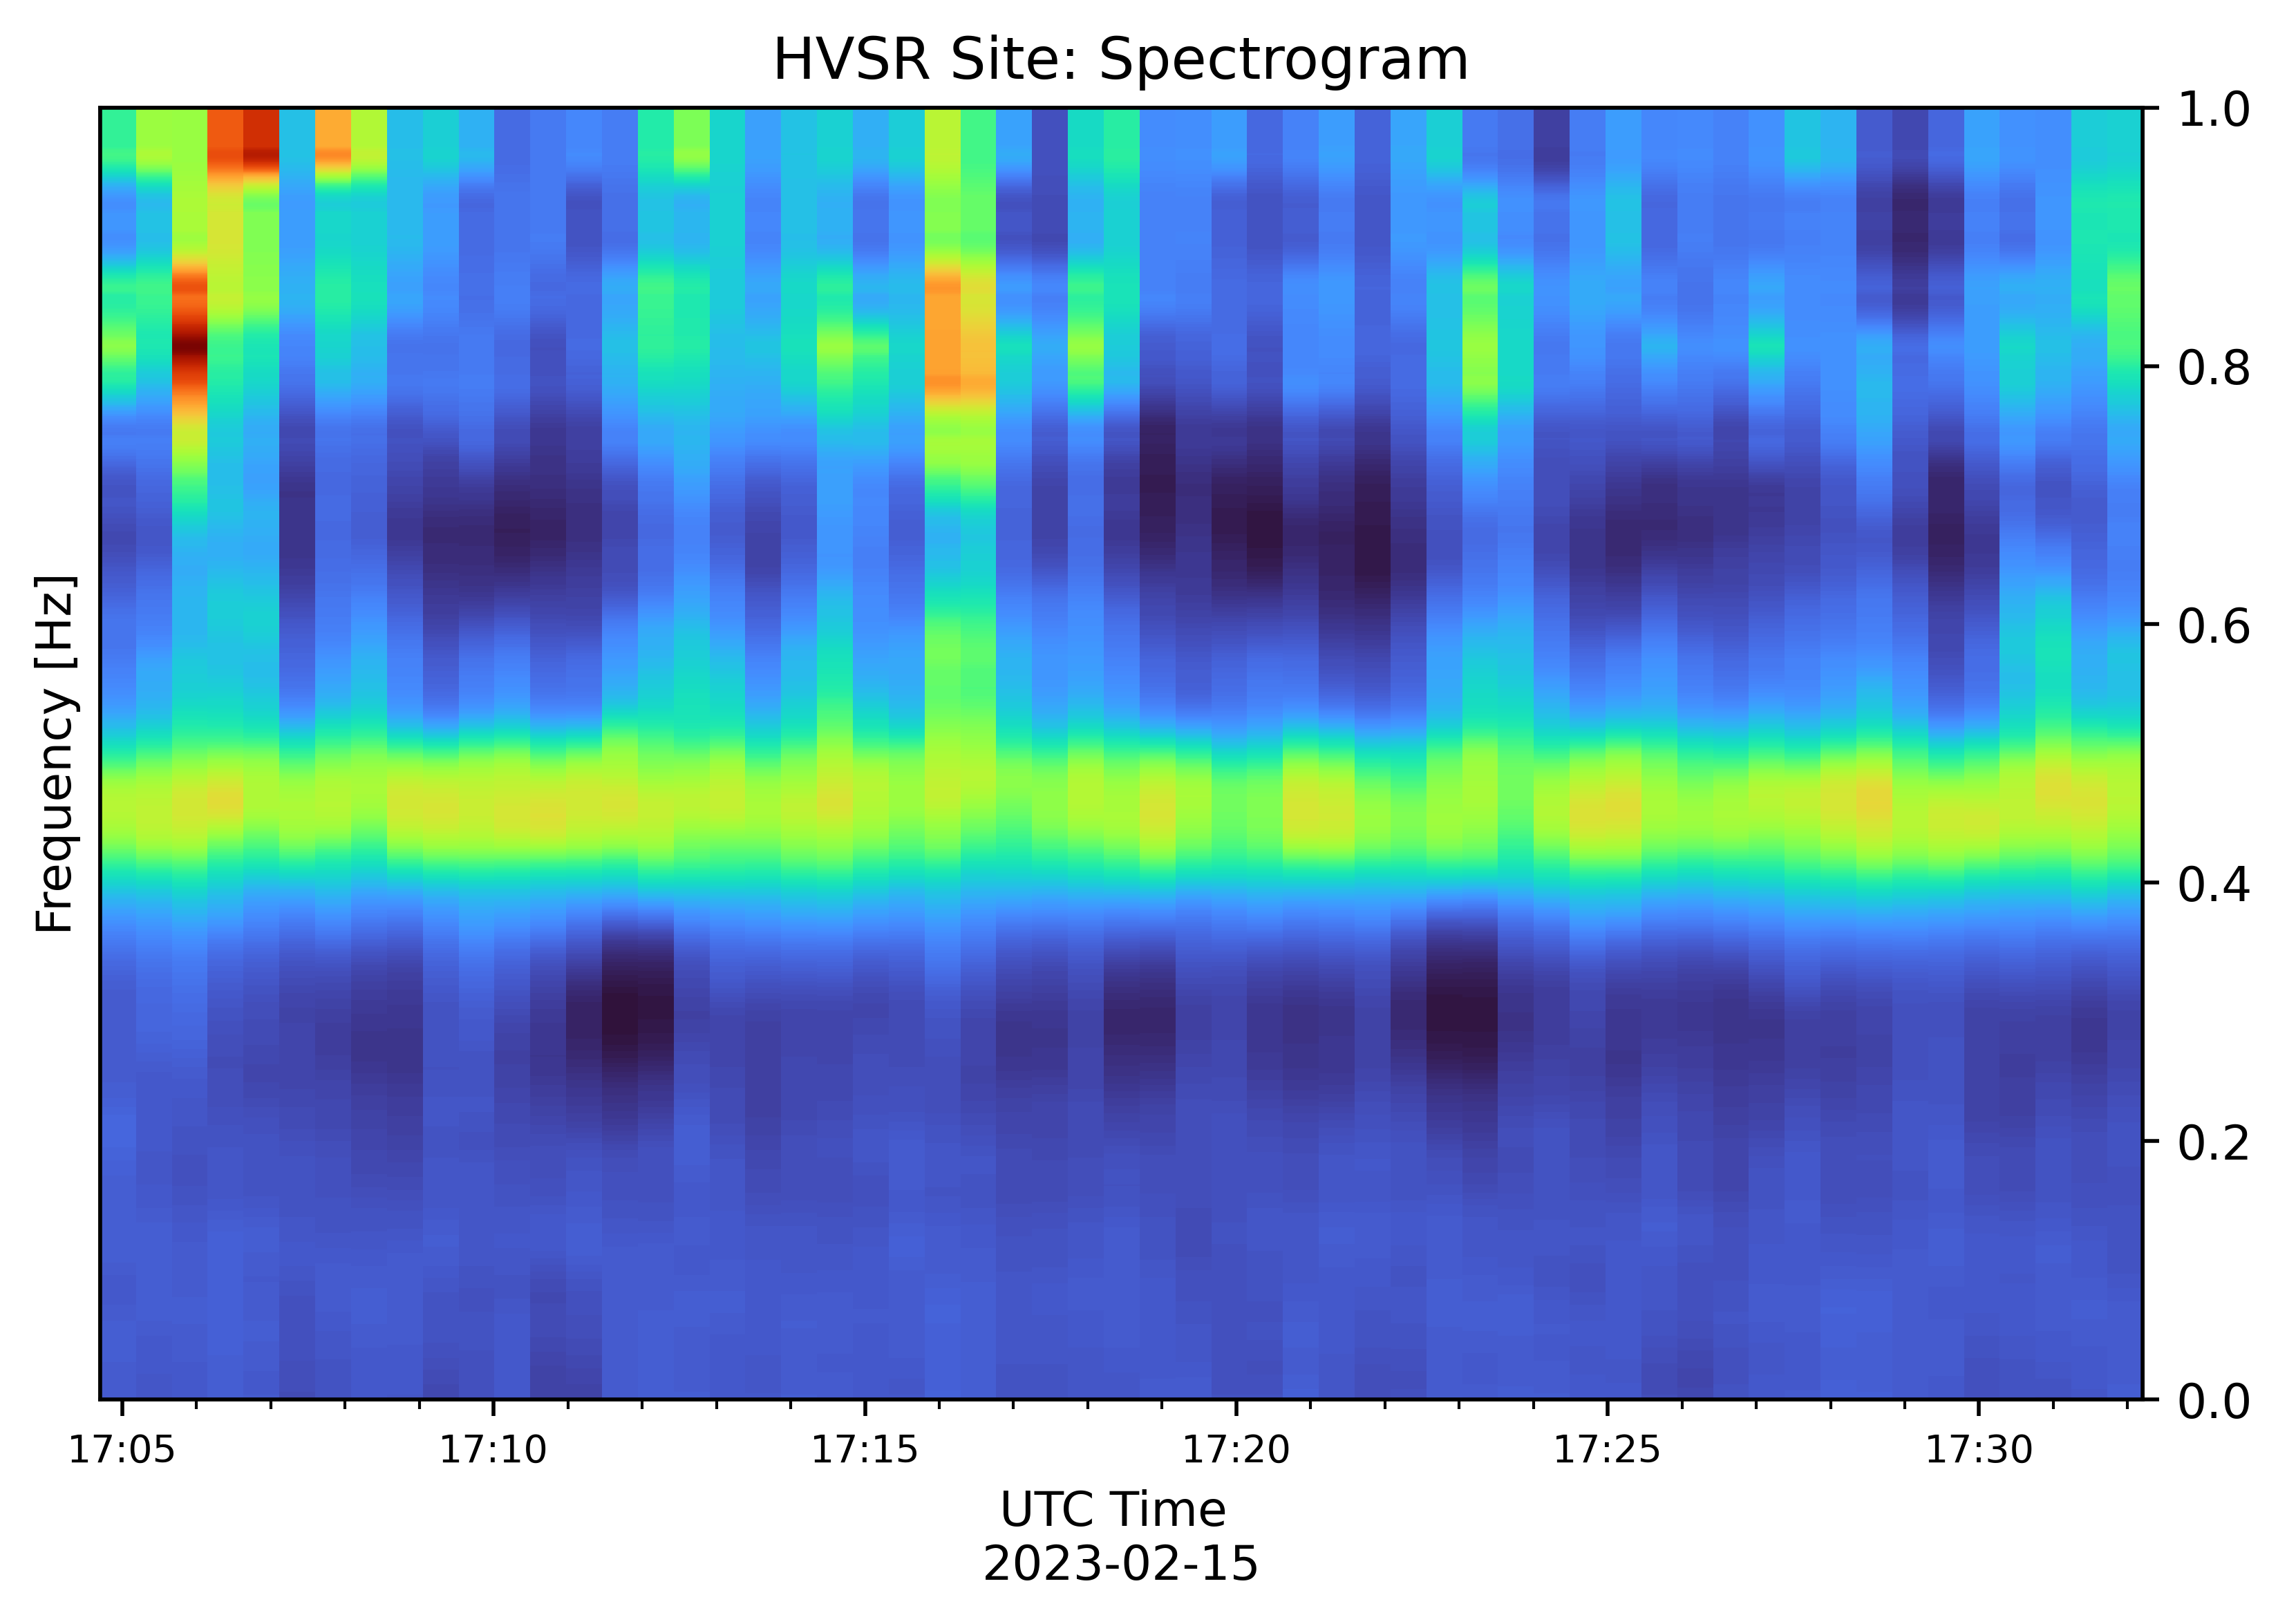

In [9]:
import numpy as np

use_subplots = False

kind='HVSR p t -s ann c+ p ann spec'

compList = ['c', 'comp', 'component', 'components']
specgramList = ['spec', 'specgram', 'spectrogram']
hvsrList = ['hvsr', 'hv', 'h']

hvsrInd = np.nan
compInd = np.nan
specInd = np.nan

kList = kind.split(' ')
for i, k in enumerate(kList):
    kList[i] = k.lower()

#HVSR index
if len(set(hvsrList).intersection(kList)):
    for i, hv in enumerate(hvsrList):
        if hv in kList:
            hvsrInd = kList.index(hv)
            break
#Component index
#if len(set(compList).intersection(kList)):
for i, c in enumerate(kList):
    if '+' in c and c[:-1] in compList:
        compInd = kList.index(c)
        break
    
#Specgram index
if len(set(specgramList).intersection(kList)):
    for i, sp in enumerate(specgramList):
        if sp in kList:
            specInd = kList.index(sp)
            break        

indList = [hvsrInd, compInd, specInd]
indListCopy = indList.copy()
plotTypeList = ['hvsr', 'comp', 'spec']

plotTypeOrder = []
plotIndOrder = []

lastVal = 0
while lastVal != 99:
    firstInd = np.nanargmin(indListCopy)
    plotTypeOrder.append(plotTypeList[firstInd])
    plotIndOrder.append(indList[firstInd])
    lastVal = indListCopy[firstInd]
    indListCopy[firstInd] = 99 #high number

plotTypeOrder.pop()
plotIndOrder[-1]=len(kList)


print(plotTypeOrder)
print(plotIndOrder)

for i, p in enumerate(plotTypeOrder):
    pStartInd = plotIndOrder[i]
    pEndInd = plotIndOrder[i+1]
    plotComponents = kList[pStartInd:pEndInd]

    print(plotComponents)
    if use_subplots and i==0:
        mosaicPlots = []
        for pto in plotTypeOrder:
            mosaicPlots.append([pto])
        fig, ax = plt.subplot_mosaic(mosaicPlots)
        axis = ax[p]
    elif use_subplots:
        axis = ax[p]
    else:
        fig, axis = plt.subplots()
        
    if p == 'hvsr':
        sprit.plot_hvsr(hvsr_dict, fig=fig, ax=axis, kind=plotComponents, xtype='x_freqs')
    elif p=='comp':
        plotComponents[0] = plotComponents[0][:-1]
        sprit.plot_hvsr(hvsr_dict, fig=fig, ax=axis, kind=plotComponents, xtype='x_freqs')
    elif p=='spec':
        sprit.plot_specgram_hvsr(hvsr_dict, fig=fig, ax=axis)
    else:
        print('Error')